<a href="https://colab.research.google.com/github/AlumiK/tensorflow2-notebooks/blob/main/07%20Transfer%20Learning/16_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning

In [ ]:
import glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-07231571-9666-63ed-7cf1-78413226d698)


In [ ]:
!wget -nc "https://lazyprogrammer.me/course_files/Food-5K.zip"
!unzip -qq -o "Food-5K.zip"
!mkdir "data"
!mkdir "data/train"
!mkdir "data/test"
!mkdir "data/train/nonfood"
!mkdir "data/train/food"
!mkdir "data/test/nonfood"
!mkdir "data/test/food"
!mv Food-5K/training/0*.jpg "data/train/nonfood"
!mv Food-5K/training/1*.jpg "data/train/food"
!mv Food-5K/validation/0*.jpg "data/test/nonfood"
!mv Food-5K/validation/1*.jpg "data/test/food"

--2020-10-12 09:28:51--  https://lazyprogrammer.me/course_files/Food-5K.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.80.48, 104.31.81.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  9.08MB/s    in 42s     

2020-10-12 09:29:34 (10.1 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [ ]:
TRAIN_PATH = 'data/train'
TEST_PATH = 'data/test'
IMAGE_SIZE = [200, 200]
BATCH_SIZE = 128

train_images = glob.glob(f'{TRAIN_PATH}/*/*.jpg')
test_images = glob.glob(f'{TEST_PATH}/*/*.jpg')
folders = glob.glob(f'{TRAIN_PATH}/*')

gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)
train_gen = gen.flow_from_directory(
    TRAIN_PATH,
    shuffle=True,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)
test_gen = gen.flow_from_directory(
    TEST_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Epoch 1/10
24/24 [==============================] - 55s 2s/step - loss: 1.0914 - accuracy: 0.9410 - val_loss: 0.7853 - val_accuracy: 0.9670
Epoch 2/10
24/24 [==============================] - 50s 2s/step - loss: 0.4644 - accuracy: 0.9770 - val_loss: 0.8288 - val_accuracy: 0.9610
Epoch 3/10
24/24 [==============================] - 50s 2s/step - loss: 0.3918 - accuracy: 0.9817 - val_loss: 0.7299 - val_accuracy: 0.9660
Epoch 4/10
24/24 [==============================] - 50s 2s/step - loss: 0.1897 - accuracy: 0.9870 - val_loss: 1.2671 - val_accuracy: 0.9600
Epoch 5/10
24/24 [==============================] - 50s 2s/step - loss: 0.1833 - accuracy: 0.9860 - val_loss: 0.4325 - val_accuracy: 0.9800
Epoch 6/10
24/24 [==============================] - 50s 2s/step - loss: 0.2061 - accuracy: 0.9860 - val_loss: 0.7110 - val_accuracy: 0.9690
Epoch 7/10
24/24 [==============================] - 50s 2s/step - loss: 0.1745 - accuracy: 0.9887 - val_loss: 0.5669 - val_accuracy: 0.9760
Epoch 8/10
24/24 [==

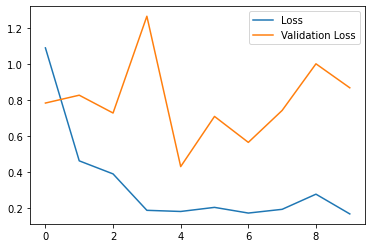

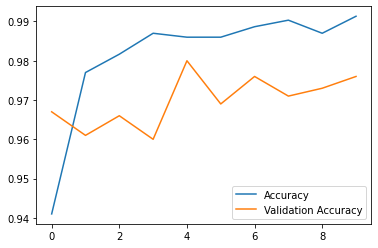

In [ ]:
vgg16 = tf.keras.applications.vgg16.VGG16(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False
)
vgg16.trainable = False

K = len(folders)
x = tf.keras.layers.Flatten()(vgg16.output)
x = tf.keras.layers.Dense(K, activation='softmax')(x)
model = tf.keras.models.Model(inputs=vgg16.input, outputs=x)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(train_gen,
              validation_data=test_gen,
              epochs=10,
              steps_per_epoch=int(np.ceil(len(train_images) / BATCH_SIZE)),
              validation_steps=int(np.ceil(len(test_images) / BATCH_SIZE)))

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()